# Import KBase and cFBA

In [1]:
# import kbase
import os
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

import cobrakbase
token = '4GBQCLKV4Z7OOJZMI43UB27QIPGS353I'
kbase = cobrakbase.KBaseAPI(token)

model = kbase.get_from_ws("CMM_iAH991V2_iML1515.kb",40576)
media = kbase.get_from_ws("Btheta_Ecoli_minimal_media",40576)

%matplotlib inline

cobrakbase 0.2.8


In [7]:
print(type(media))

<class 'cobrakbase.core.kbasebiochem.media.Media'>


In [6]:
x = 2
b = None
print(all(i is None for i in [x,b]))

False


In [8]:
for met in model.metabolites:
    if met in None:
        print('yes')
    print(dir(met))
    print(met.elements)
    break

TypeError: argument of type 'NoneType' is not iterable

# 2-member Zahmeeth model

## Unconstained model

### Define and execute the model

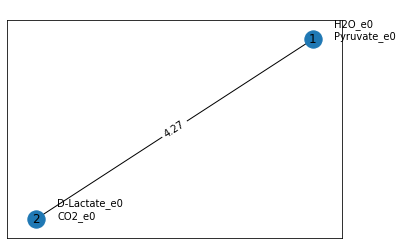

,IDs,Metabolites/Donor,Environment,Species1,Species2
0,cpd03161_e0,Phenethylamine_e0,0,0.0,0
1,cpd01155_e0,Cadaverine_e0,0,0.0,0
2,cpd00130_e0,L-Malate_e0,0,0.0,0
3,cpd04273_e0,Deferoxamine_e0,0,0.0,0
4,cpd02361_e0,4-Hydroxyphenylacetaldehyde_e0,0,0.0,0
5,cpd04095_e0,Fusidic acid_e0,0,0.0,0
6,cpd15468_e0,Glycerophosphoserine_e0,0,0.0,0
7,cpd03704_e0,dIMP_e0,0,0.0,0
8,cpd00396_e0,L-Rhamnose_e0,0,0.0,0.0
9,metsox-S-L-e_e0,L-Methionine Sulfoxide,0,0.0,0


In [2]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg
from pandas import set_option
set_option('display.max_rows', None)

%run ../../../modelseedpy/core/mscommunity.py
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.gapfill(media)
solution = cfba.run(media)
cfba.compute_interactions(solution, export_directory = '')

## FullThermo-constrained model

### Define and execute the model

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
species 1 drain-flux objective value: 0.1743969883599166
species 2 drain-flux objective value: 0.16925387417839616

Model objective value: 0.0



Production matrix:
         1    2
Donor          
1      0.0  0.0
2      0.0  0.0


Consumption matrix:
            1    2
Receiver          
1         0.0  0.0
2         0.0  0.0




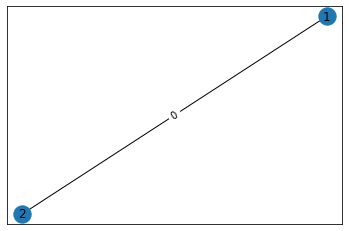

In [3]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ["CMM_iAH991V2_iML1515.kb",40576]
mediaInfo_2 = ["Btheta_Ecoli_minimal_media",40576]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media, msdb_path_for_fullthermo = ftp_path, verbose = False)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

# 3-member Electrosynth model

## Unconstrained model

### Define and execute the model

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Making biomass drain: cpd11416_c3
species 1 drain-flux objective value: 2.066246891916704
species 2 drain-flux objective value: 6.182228448150425
species 3 drain-flux objective value: 6.145662130043192

Model objective value: 3.766216581357344



Production matrix:
                1            2            3
Donor                                      
1        0.000000   526.567332   681.068788
2      615.130758     0.000000  2492.677015
3      145.763634  2307.900404     0.000000


Consumption matrix:
                   1            2            3
Receiver                                      
1           0.000000   615.130758   145.763634
2         526.567332     0.000000  2307.900404
3         681.068788  2492.677015     0.000000




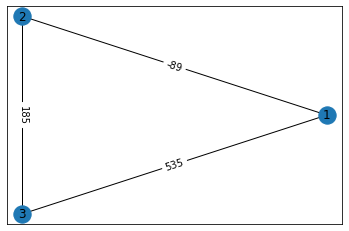

In [4]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['electrosynth_comnty.mdl.gf.2021',93204]
mediaInfo_2 = ["CO2_minimal",93204]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

## FullThermo-constrained model

### Define and execute the model

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Making biomass drain: cpd11416_c3
species 1 drain-flux objective value: 2.066246891916704
species 2 drain-flux objective value: 6.182228448150425
species 3 drain-flux objective value: 6.145662130043192

Model objective value: 0.0



Production matrix:
         1    2    3
Donor               
1      0.0  0.0  0.0
2      0.0  0.0  0.0
3      0.0  0.0  0.0


Consumption matrix:
            1    2    3
Receiver               
1         0.0  0.0  0.0
2         0.0  0.0  0.0
3         0.0  0.0  0.0




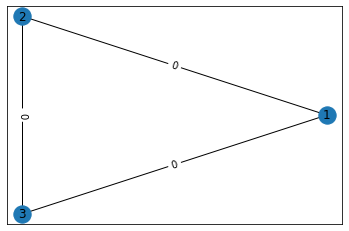

In [5]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['electrosynth_comnty.mdl.gf.2021',93204]
mediaInfo_2 = ["CO2_minimal",93204]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media, msdb_path_for_fullthermo = ftp_path, verbose = False)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

# 2-member Aimee model

## Unconstrained model

### Chitin media

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
species 1 drain-flux objective value: 0.0
species 2 drain-flux objective value: 0.0


/usr/local/lib/python3.8/dist-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.


Model objective value: 0.0



Production matrix:
         1    2
Donor          
1      0.0  0.0
2      0.0  0.0


Consumption matrix:
            1    2
Receiver          
1         0.0  0.0
2         0.0  0.0




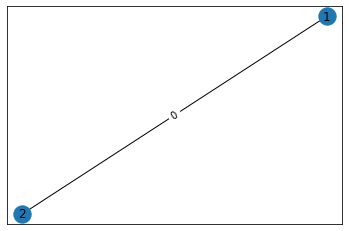

In [6]:
# import the model
%run ../../../modelseedpy/core/mscommunity.py
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['Cjaponicus_Ecoli_Community',97055]
mediaInfo_2 = ["ChitinM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media) 
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

## FullThermo-constrained model

### Define and execute the model

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
species 1 drain-flux objective value: 0.0
species 2 drain-flux objective value: 0.0


/usr/local/lib/python3.8/dist-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.


Model objective value: 0.0



Production matrix:
         1    2
Donor          
1      0.0  0.0
2      0.0  0.0


Consumption matrix:
            1    2
Receiver          
1         0.0  0.0
2         0.0  0.0




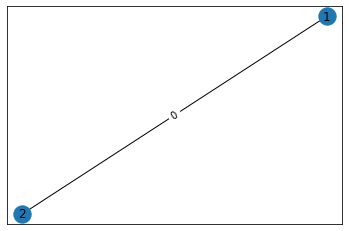

In [7]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['Cjaponicus_Ecoli_Community',97055]
mediaInfo_2 = ["ChitinM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media, msdb_path_for_fullthermo = ftp_path, verbose = False)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

# 7-member Hotlake model

## Unconstrained model

### Define and execute the model

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Making biomass drain: cpd11416_c3
Making biomass drain: cpd11416_c4
Making biomass drain: cpd11416_c5
Making biomass drain: cpd11416_c6
Making biomass drain: cpd11416_c7
species 1 drain-flux objective value: 0.0
species 2 drain-flux objective value: 0.0
species 3 drain-flux objective value: 0.0
species 4 drain-flux objective value: 0.0
species 5 drain-flux objective value: 0.0
species 6 drain-flux objective value: 0.0
species 7 drain-flux objective value: 0.0


/usr/local/lib/python3.8/dist-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.


Model objective value: 0.0



Production matrix:
         1    2    3    4    5    6    7
Donor                                   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0
5      0.0  0.0  0.0  0.0  0.0  0.0  0.0
6      0.0  0.0  0.0  0.0  0.0  0.0  0.0
7      0.0  0.0  0.0  0.0  0.0  0.0  0.0


Consumption matrix:
            1    2    3    4    5    6    7
Receiver                                   
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0
5         0.0  0.0  0.0  0.0  0.0  0.0  0.0
6         0.0  0.0  0.0  0.0  0.0  0.0  0.0
7         0.0  0.0  0.0  0.0  0.0  0.0  0.0




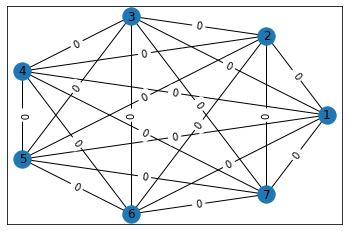

In [8]:
# import the model
%run ../../../modelseedpy/core/mscommunity.py
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ["Hot_Lake_seven.mdl",93544]
mediaInfo_2 = ["HotLakeMedia",93544]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

## FullThermo-constrained model

### Define and execute the model

In [ ]:
# import the model
%run ../../modelseedpy/core/mscommunity.py
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ["Hot_Lake_seven.mdl",93544]
mediaInfo_2 = ["HotLakeMedia",93544]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media, msdb_path_for_fullthermo = ftp_path, verbose = False)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Making biomass drain: cpd11416_c3
Making biomass drain: cpd11416_c4
Making biomass drain: cpd11416_c5
Making biomass drain: cpd11416_c6
Making biomass drain: cpd11416_c7
species 1 drain-flux objective value: 0.0
species 2 drain-flux objective value: 0.0
species 3 drain-flux objective value: 0.0
species 4 drain-flux objective value: 0.0
species 5 drain-flux objective value: 0.0
species 6 drain-flux objective value: 0.0
species 7 drain-flux objective value: 0.0


/usr/local/lib/python3.8/dist-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.

